# Import libraries

In [36]:
import matplotlib.pyplot as plt
from glob import glob
import cv2

# install ultralytics
!pip install ultralytics

# Read data

In [ ]:
# download data from roboflow
!curl -L "https://universe.roboflow.com/ds/CjySWj3x7p?key=I8oF85yx7K" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [3]:
# view data.yaml
with open('data.yaml', 'r') as f:
  print(f.read())
  f.close()

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['License_Plate']


In [9]:
# view images & lables count
for i in ['train','test','valid']:
  print(f"{i} images: {len(glob(i+'/images/*'))}")
  print(f"{i} labels: {len(glob(i+'/labels/*'))}\n")

train images: 21173
train labels: 21173

test images: 1019
test labels: 1019

valid images: 2046
valid labels: 2046



# Data visualization

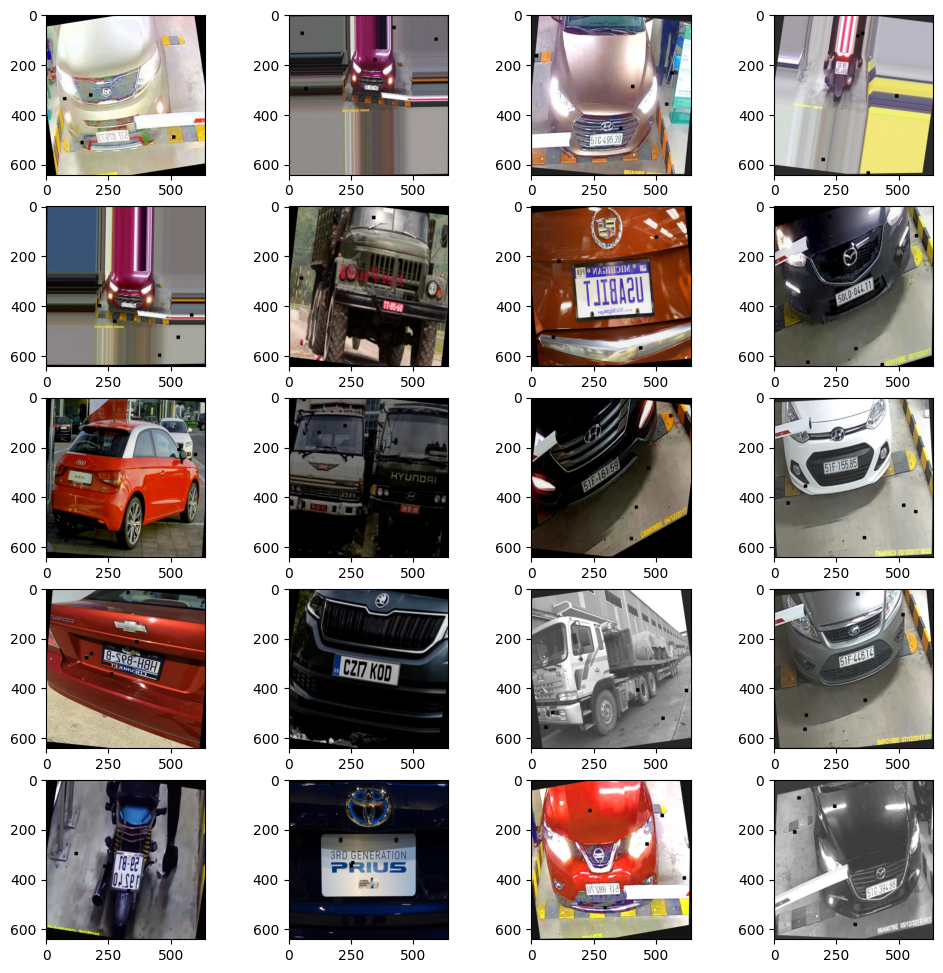

In [23]:
fig, ax = plt.subplots(5,4, figsize=(12,12))

imgs = glob('train/images/*')[-20:]
for i in range(20):
  ax[i//4, i%4].imshow(plt.imread(imgs[i]))
plt.show()

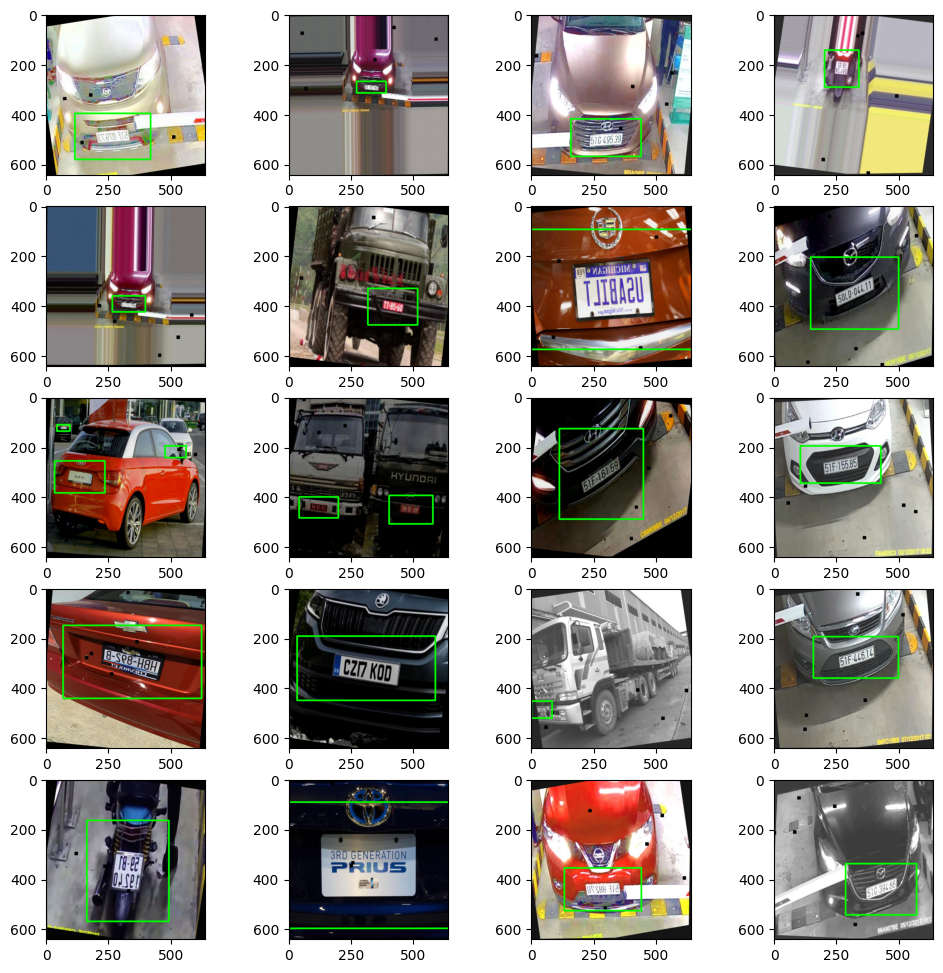

In [45]:
# view labeled images

fig, ax = plt.subplots(5,4, figsize=(12,12))

images = glob('train/images/*')[-20:]
labels = ['train/labels/'+i[13:-3]+'txt' for i in images]
for i in range(20):
  image = plt.imread(imgs[i])
  with open(labels[i], 'r') as f:
    pos = f.read().split('\n')
    f.close()
  for j in pos:
    _,x,y,w,h = map(float, j.split())
    cv2.rectangle(image, (int((x-w)*640), int((y-h)*640)), (int((x+w)*640), int((y+h)*640)), (0,255,0), 5)
  ax[i//4, i%4].imshow(image)
plt.show()

# Train

In [ ]:
# train
!yolo detect train model=yolov8n.pt data=data.yaml epochs=10 imgsz=416 batch=128

100% 6.23M/6.23M [00:00<00:00, 276MB/s]
Ultralytics YOLOv8.0.75 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, patience=50, batch=128, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8